In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
df = pd.read_csv('Copy of sonar data.csv', header=None)

In [10]:
df.head(6)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [11]:
df.shape

(208, 61)

In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [15]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [18]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [25]:
X = df.drop(columns=60,axis=1)
Y = df[60]

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)

In [37]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(187, 60) (187,) (21, 60) (21,)


In [38]:
print(X_train)


         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

In [39]:
print(Y_train)

115    M
38     R
56     R
123    M
18     R
      ..
140    M
5      R
154    M
131    M
203    M
Name: 60, Length: 187, dtype: object


In [40]:
model = LogisticRegression()

In [42]:
model.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:

predict = model.predict(X_train)

In [106]:
model.score(X_test,Y_test)

0.6666666666666666

In [50]:
predict

array(['M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'R',
       'M', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'R', 'R', 'M', 'M',
       'R', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'M',
       'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M',
       'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'R', 'R',
       'R', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'R', 'M', 'R', 'M',
       'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'M',
       'M', 'R', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'R', 'R', 'R', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R',
       'M', 'R', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R',
       'M', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'R',
       'M', 'R', 'R', 'R', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M

In [51]:
training_data_accuracy = accuracy_score(predict, Y_train) 

In [52]:
training_data_accuracy 

0.8235294117647058

In [53]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

In [57]:
in_data_asarray = np.asarray(input_data)

In [60]:
in_data_asarray = in_data_asarray.reshape(1,-1)

In [61]:
in_data_asarray

array([[0.0307, 0.0523, 0.0653, 0.0521, 0.0611, 0.0577, 0.0665, 0.0664,
        0.146 , 0.2792, 0.3877, 0.4992, 0.4981, 0.4972, 0.5607, 0.7339,
        0.823 , 0.9173, 0.9975, 0.9911, 0.824 , 0.6498, 0.598 , 0.4862,
        0.315 , 0.1543, 0.0989, 0.0284, 0.1008, 0.2636, 0.2694, 0.293 ,
        0.2925, 0.3998, 0.366 , 0.3172, 0.4609, 0.4374, 0.182 , 0.3376,
        0.6202, 0.4448, 0.1863, 0.142 , 0.0589, 0.0576, 0.0672, 0.0269,
        0.0245, 0.019 , 0.0063, 0.0321, 0.0189, 0.0137, 0.0277, 0.0152,
        0.0052, 0.0121, 0.0124, 0.0055]])

In [63]:
prediction = model.predict(in_data_asarray)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

['M']
The object is a mine


In [71]:
X_train.iloc[-1:,]

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.163,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157


In [72]:
X_train.tail()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
140,0.0412,0.1135,0.0518,0.0232,0.0646,0.1124,0.1787,0.2407,0.2682,0.2058,...,0.0798,0.0376,0.0143,0.0272,0.0127,0.0166,0.0095,0.0225,0.0098,0.0085
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
154,0.0117,0.0069,0.0279,0.0583,0.0915,0.1267,0.1577,0.1927,0.2361,0.2169,...,0.0039,0.0053,0.0029,0.0020,0.0013,0.0029,0.0020,0.0062,0.0026,0.0052
131,0.1150,0.1163,0.0866,0.0358,0.0232,0.1267,0.2417,0.2661,0.4346,0.5378,...,0.0228,0.0099,0.0065,0.0085,0.0166,0.0110,0.0190,0.0141,0.0068,0.0086
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157


In [73]:
show = model.predict(X_train.iloc[-1:,])

In [74]:
if (show[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

The object is a mine


In [79]:
model.predict([X_test.iloc[-1, :]])

array(['R'], dtype=object)

In [80]:
Y_test.iloc[-1]

'M'

In [81]:
show =  model.predict(X_train.iloc[-2:,])

In [82]:
show

array(['M', 'M'], dtype=object)

In [86]:
X_test.tail()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053
172,0.0180,0.0444,0.0476,0.0698,0.1615,0.0887,0.0596,0.1071,0.3175,0.2918,...,0.0122,0.0122,0.0114,0.0098,0.0027,0.0025,0.0026,0.0050,0.0073,0.0022
68,0.0195,0.0142,0.0181,0.0406,0.0391,0.0249,0.0892,0.0973,0.0840,0.1191,...,0.0125,0.0028,0.0067,0.0120,0.0012,0.0022,0.0058,0.0042,0.0067,0.0012
102,0.0587,0.1210,0.1268,0.1498,0.1436,0.0561,0.0832,0.0672,0.1372,0.2352,...,0.0215,0.0331,0.0111,0.0088,0.0158,0.0122,0.0038,0.0101,0.0228,0.0124
106,0.0331,0.0423,0.0474,0.0818,0.0835,0.0756,0.0374,0.0961,0.0548,0.0193,...,0.0133,0.0078,0.0174,0.0176,0.0038,0.0129,0.0066,0.0044,0.0134,0.0092


In [85]:
  X_test.iloc[-1, :]

0     0.0331
1     0.0423
2     0.0474
3     0.0818
4     0.0835
5     0.0756
6     0.0374
7     0.0961
8     0.0548
9     0.0193
10    0.0897
11    0.1734
12    0.1936
13    0.2803
14    0.3313
15    0.5020
16    0.6360
17    0.7096
18    0.8333
19    0.8730
20    0.8073
21    0.7507
22    0.7526
23    0.7298
24    0.6177
25    0.4946
26    0.4531
27    0.4099
28    0.4540
29    0.4124
30    0.3139
31    0.3194
32    0.3692
33    0.3776
34    0.4469
35    0.4777
36    0.4716
37    0.4664
38    0.3893
39    0.4255
40    0.4064
41    0.3712
42    0.3863
43    0.2802
44    0.1283
45    0.1117
46    0.1303
47    0.0787
48    0.0436
49    0.0224
50    0.0133
51    0.0078
52    0.0174
53    0.0176
54    0.0038
55    0.0129
56    0.0066
57    0.0044
58    0.0134
59    0.0092
Name: 106, dtype: float64

In [88]:
model.predict([X_test.iloc[-1, :]])

array(['R'], dtype=object)

In [89]:
Y_test.iloc[-1]

'M'

In [90]:
model.predict([X_test.iloc[-2]])

array(['R'], dtype=object)

In [91]:
Y_test.iloc[-2]

'M'

In [92]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


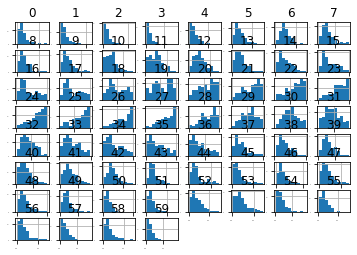

In [95]:
import matplotlib.pyplot as plt
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

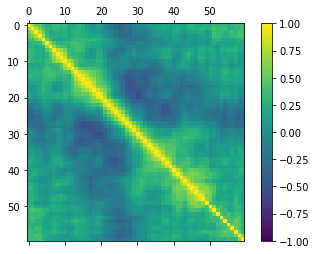

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

In [101]:
from sklearn.neural_network import MLPClassifier
Model = MLPClassifier(hidden_layer_sizes=(100,200,400,500), max_iter=1000)

In [102]:
Model.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 200, 400, 500), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [104]:
Model.score(X_test,Y_test)

0.8571428571428571

In [107]:
y_pred = Model.predict(X_test)

In [108]:
len(y_pred)

21

In [110]:
print(y_pred)
print(Y_test)

['M' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'M'
 'R' 'M' 'M']
113    M
23     R
45     R
81     R
82     R
109    M
176    M
134    M
96     R
98     M
57     R
169    M
13     R
204    M
10     R
161    M
7      R
172    M
68     R
102    M
106    M
Name: 60, dtype: object


In [111]:
my_test_data = [0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044]

In [112]:
my_test_oned = np.asarray(my_test_data)

In [114]:
my_test_data_shape = my_test_oned.reshape(1,-1)

In [115]:
my_test_data_shape

array([[0.0453, 0.0523, 0.0843, 0.0689, 0.1183, 0.2583, 0.2156, 0.3481,
        0.3337, 0.2872, 0.4918, 0.6552, 0.6919, 0.7797, 0.7464, 0.9444,
        1.    , 0.8874, 0.8024, 0.7818, 0.5212, 0.4052, 0.3957, 0.3914,
        0.325 , 0.32  , 0.3271, 0.2767, 0.4423, 0.2028, 0.3788, 0.2947,
        0.1984, 0.2341, 0.1306, 0.4182, 0.3835, 0.1057, 0.184 , 0.197 ,
        0.1674, 0.0583, 0.1401, 0.1628, 0.0621, 0.0203, 0.053 , 0.0742,
        0.0409, 0.0061, 0.0125, 0.0084, 0.0089, 0.0048, 0.0094, 0.0191,
        0.014 , 0.0049, 0.0052, 0.0044]])

In [116]:
Model.predict(my_test_data_shape)

array(['R'], dtype='<U1')

In [121]:
df=df.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [122]:
array = df.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [125]:
df.groupby(60).size()

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

In [126]:
df.head(5)

AttributeError: 'numpy.ndarray' object has no attribute 'head'